In [138]:
from nilearn import datasets
from nilearn import surface
from nilearn import plotting
import numpy as np
from scipy import stats
import nibabel as nib
import pandas as pd
from sklearn.linear_model import LinearRegression

In [127]:
datapath = '/scratch/groups/jyeatman/HBN_CorticalThickness_tmp/'
# Load fsaverage
fsaverage = datasets.fetch_surf_fsaverage('fsaverage')
# Load cortical thickness data
ct = surface.load_surf_data(datapath + 'lh.thickness.DyslexiaControlContrast.10.mgz')

In [128]:
# Load csv
age = pd.read_csv('/scratch/groups/jyeatman/HBN_CorticalThickness_tmp/hbn_ages_blanks.csv', header=None)
age_col = np.array(age[1])
age_float = np.array([np.nan if a == ' ' else float(a) for a in age_col])


In [129]:
# Remove nans
keep = np.logical_not(np.isnan(age_float))
age_float = age_float[keep]
ct = ct[:,keep]

In [132]:
print(age_float.shape)
print(ct.shape)

(1566,)
(163842, 1566)


In [148]:
# Compute correlations between the seed timeseries and each vertex
cor_map = np.zeros(ct.shape[0])
for ii in range(ct.shape[0]):
    cor_map[ii] = stats.pearsonr(ct[ii,:], age_float)[0]

/home/users/jyeatman/.local/lib/python3.6/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


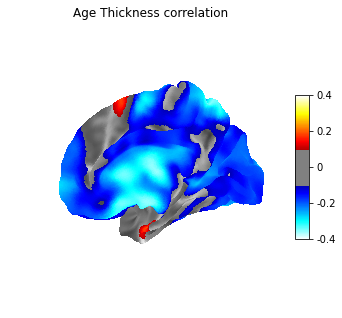

In [136]:
# Now plot the seed based connectivity
plotting.plot_surf_stat_map(fsaverage['white_left'], cor_map=stat_map,
    hemi='left', threshold = .1, vmax=0.4, view='lateral', colorbar=True,
    bg_map=fsaverage['curv_left'], title='Age Thickness correlation')
